In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('cardio_train.csv' ,delimiter=';')

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
data.isnull().sum().any()

False

In [7]:
data = data.drop('id',axis= 1)

In [54]:
data = data.iloc[:8000]

In [55]:
data.isna().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

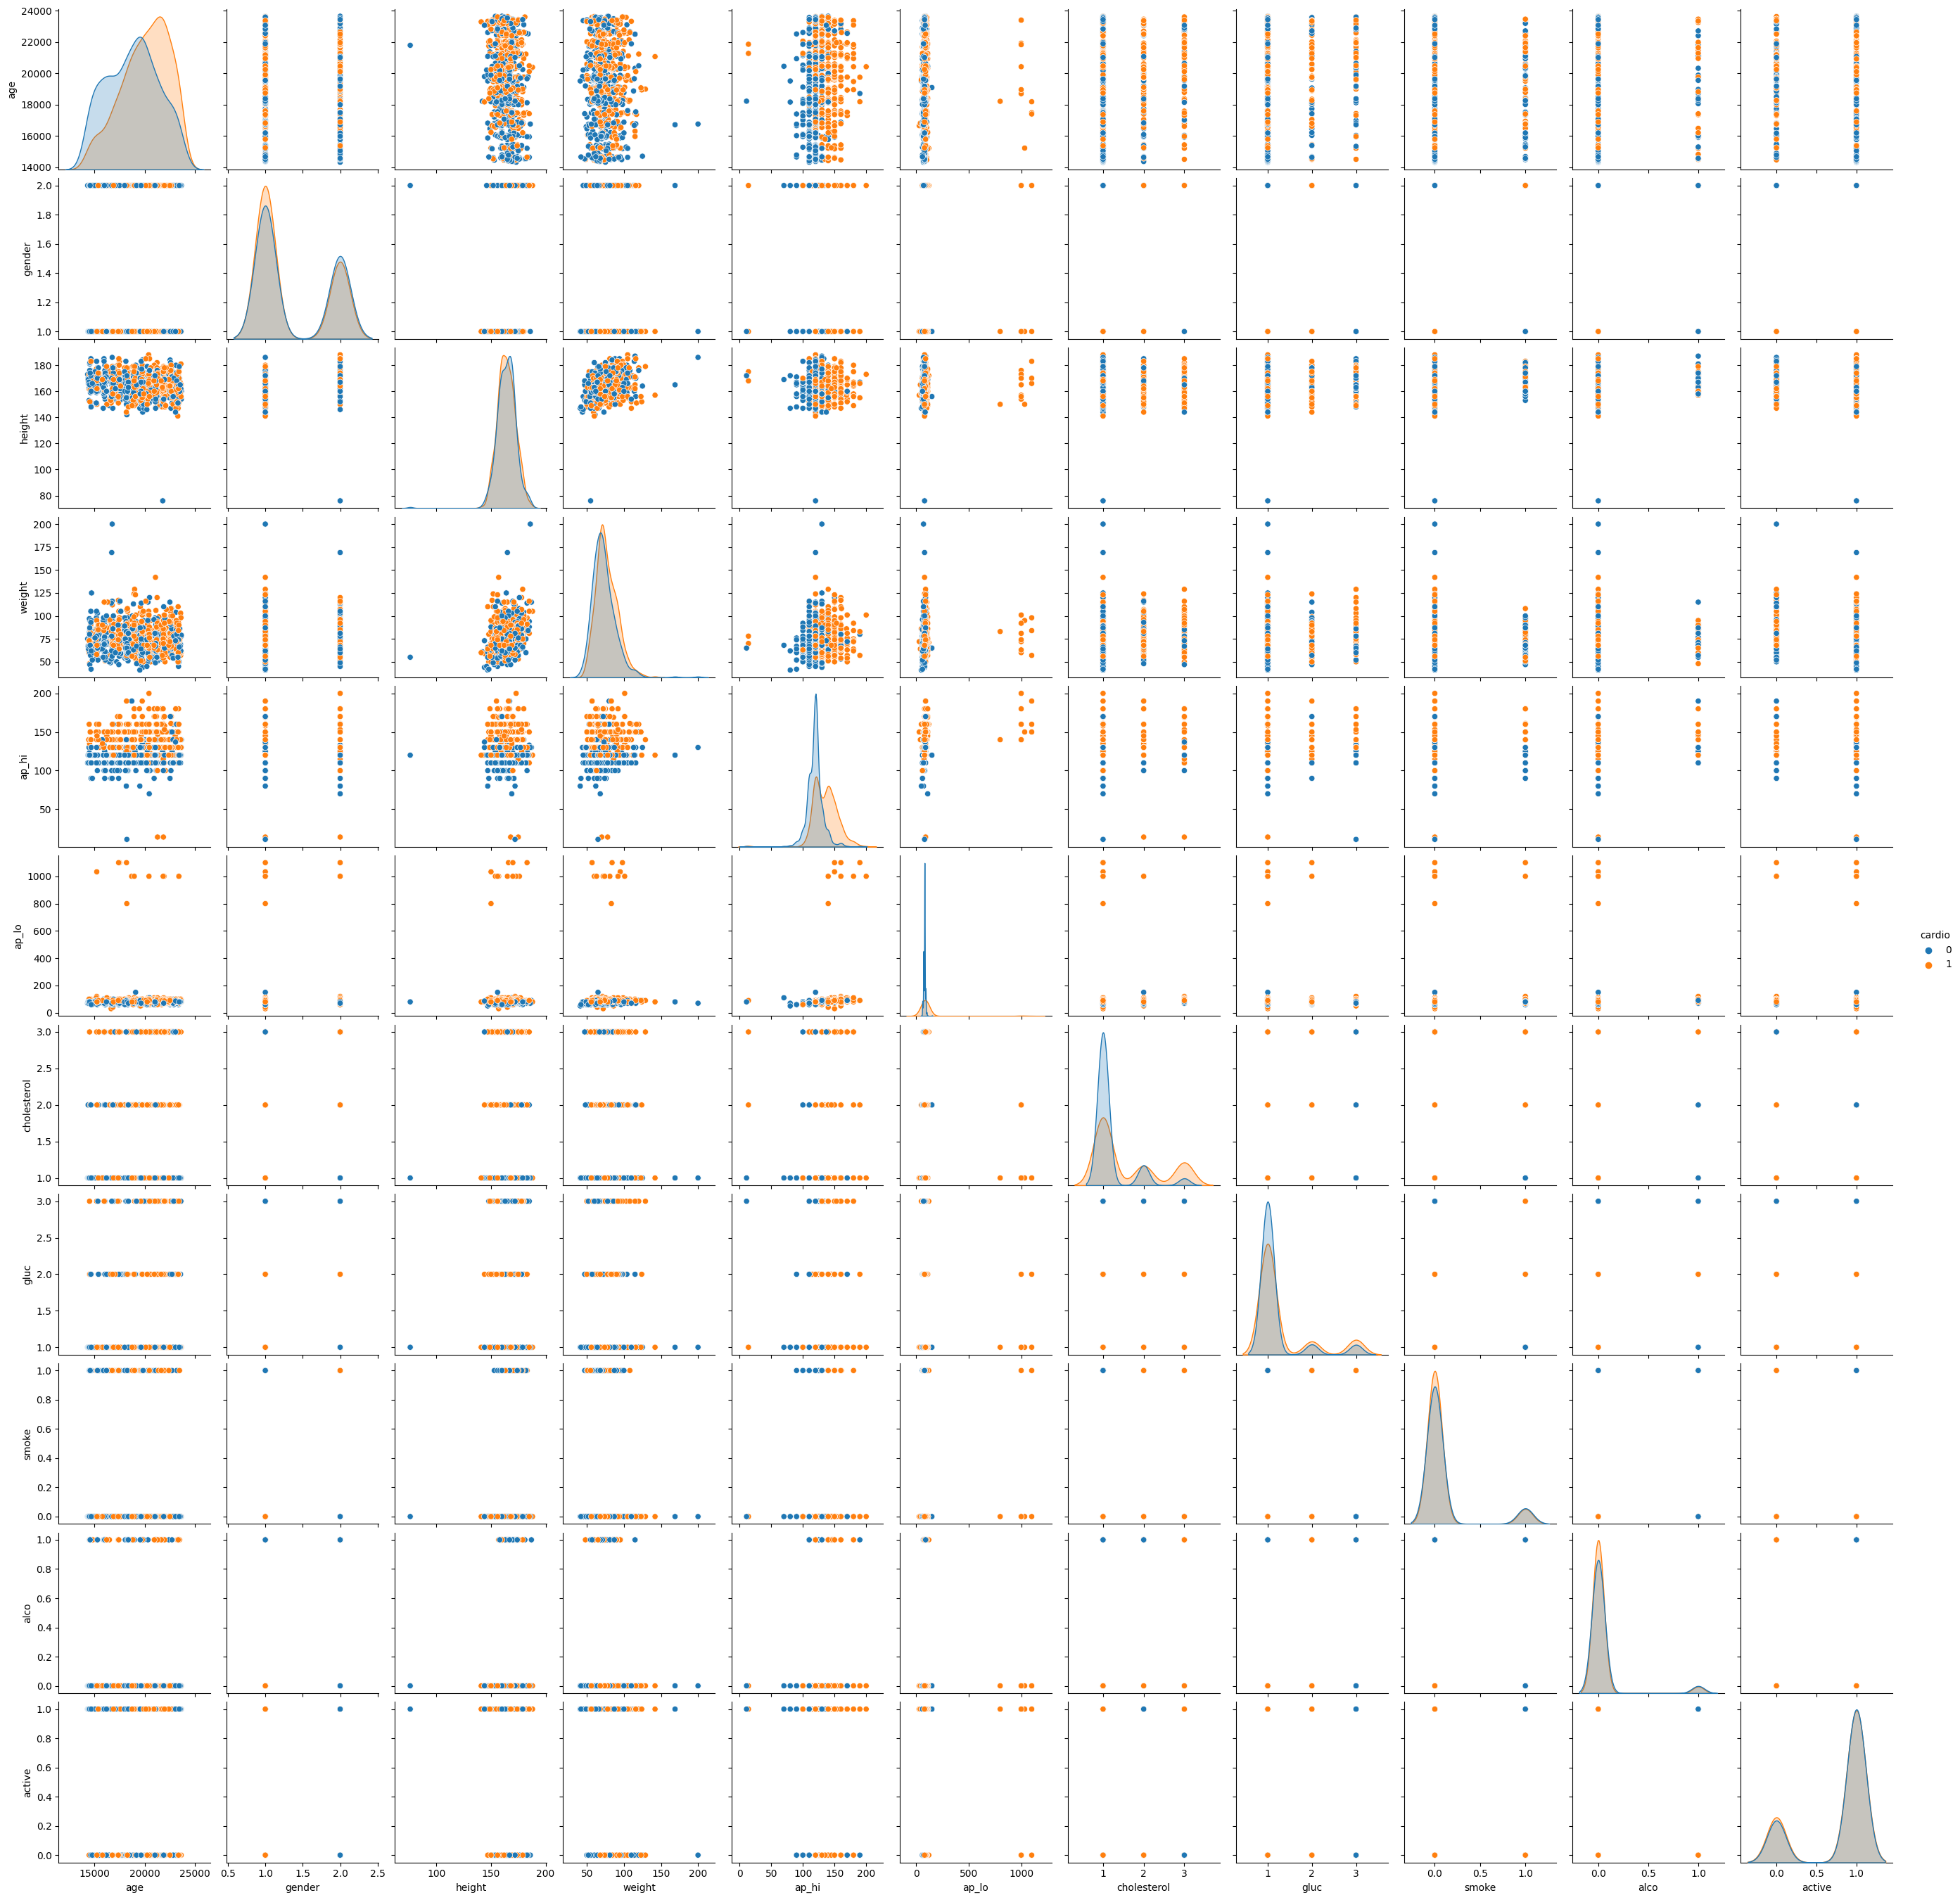

In [56]:
sns.pairplot(data,hue = 'cardio')

<Axes: xlabel='alco', ylabel='count'>

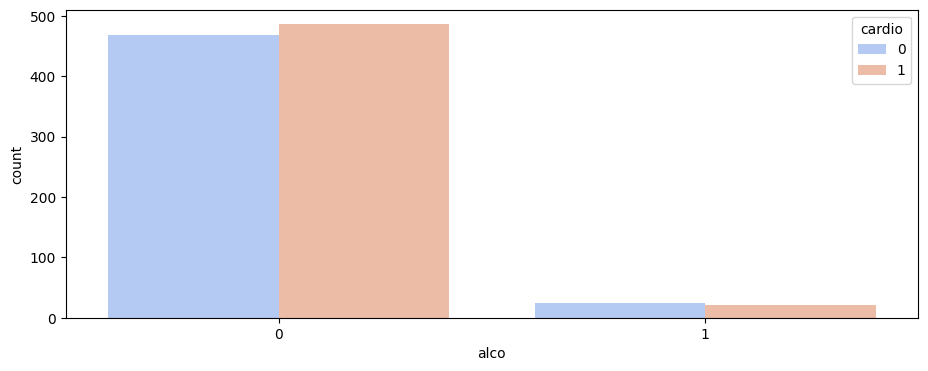

In [57]:
plt.figure(figsize=(11,4))
sns.countplot(x='alco',data=data,hue='cardio',palette='coolwarm')

<Axes: xlabel='smoke', ylabel='count'>

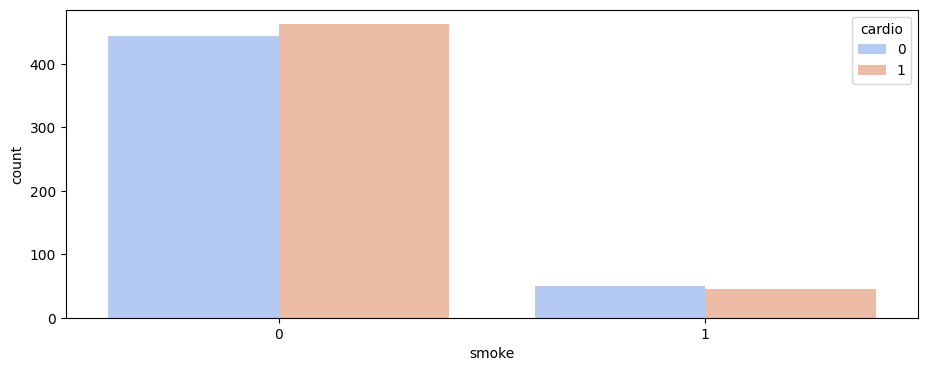

In [58]:
plt.figure(figsize=(11,4))
sns.countplot(x='smoke',data=data,hue='cardio',palette = 'coolwarm')

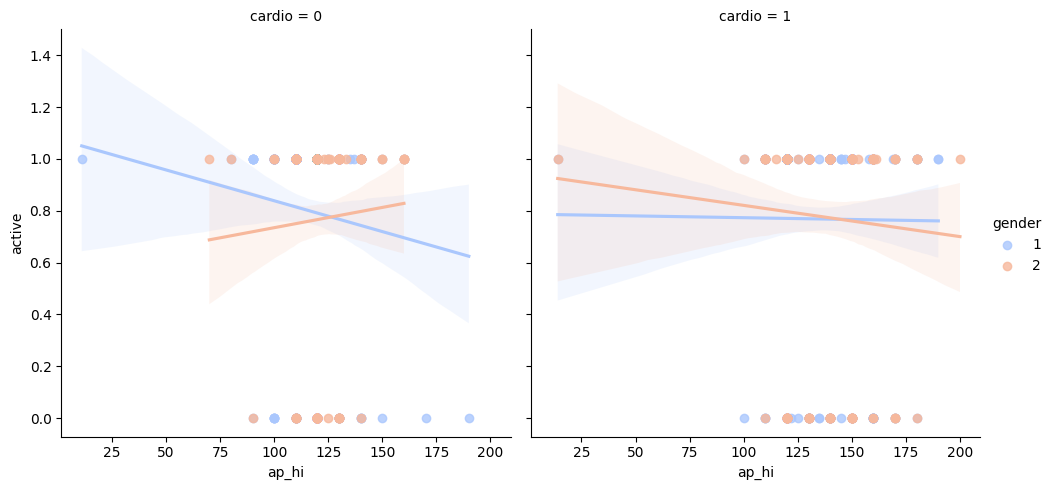

In [48]:
sns.lmplot(x='ap_hi',y='active',data=data,palette='coolwarm',hue='gender',col='cardio')

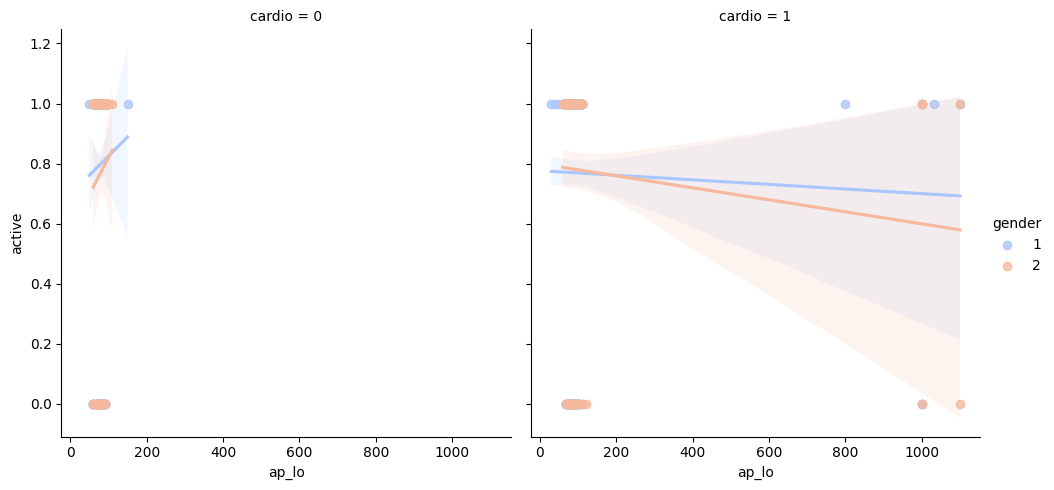

In [49]:
sns.lmplot(x='ap_lo',y='active',data=data,palette='coolwarm',hue='gender',col='cardio')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop('cardio',axis = 1)
y = data['cardio']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
k = dt.fit(X_train,y_train)

In [32]:
pred = dt.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
confusion_matrix(y_test,pred)

array([[103,  48],
       [ 66, 113]])

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       151
           1       0.70      0.63      0.66       179

    accuracy                           0.65       330
   macro avg       0.66      0.66      0.65       330
weighted avg       0.66      0.65      0.66       330



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators=100)

In [38]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
rpred = rf.predict(X_test)

In [40]:
print(classification_report(y_test,rpred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       151
           1       0.79      0.72      0.75       179

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.75      0.74      0.74       330



In [41]:
print(confusion_matrix(y_test,rpred))

[[117  34]
 [ 51 128]]


In [50]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy = accuracy_score(y_test, rpred)
print("Model Accuracy: {:.2f}".format(accuracy))

Model Accuracy: 0.74
